# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
#!pip install palmerpenguins

In [3]:
# Code Here
from palmerpenguins import load_penguins
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We need to convert species, island and sex ino dummy variable as they are categorical values

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [4]:
import pandas as pd
df_dummies = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)

df_dummies.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
X = df[['bill_length_mm']].dropna()
y = df['bill_depth_mm'].dropna()

In [7]:
sorted_indices = np.argsort(X['bill_length_mm'].values)
X_sorted = X.iloc[sorted_indices].values
y_sorted = y.iloc[sorted_indices].values


In [8]:
# Simple Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_sorted, y_sorted)
linear_pred = linear_model.predict(X_sorted)

# Quadratic Model
poly_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X_sorted)
quad_model = LinearRegression()
quad_model.fit(X_poly_2, y_sorted)
quad_pred = quad_model.predict(X_poly_2)

# Cubic Model
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X_sorted)
cubic_model = LinearRegression()
cubic_model.fit(X_poly_3, y_sorted)
cubic_pred = cubic_model.predict(X_poly_3)

# Degree 10 Model
poly_10 = PolynomialFeatures(degree=10)
X_poly_10 = poly_10.fit_transform(X_sorted)
poly_10_model = LinearRegression()
poly_10_model.fit(X_poly_10, y_sorted)
poly_10_pred = poly_10_model.predict(X_poly_10)


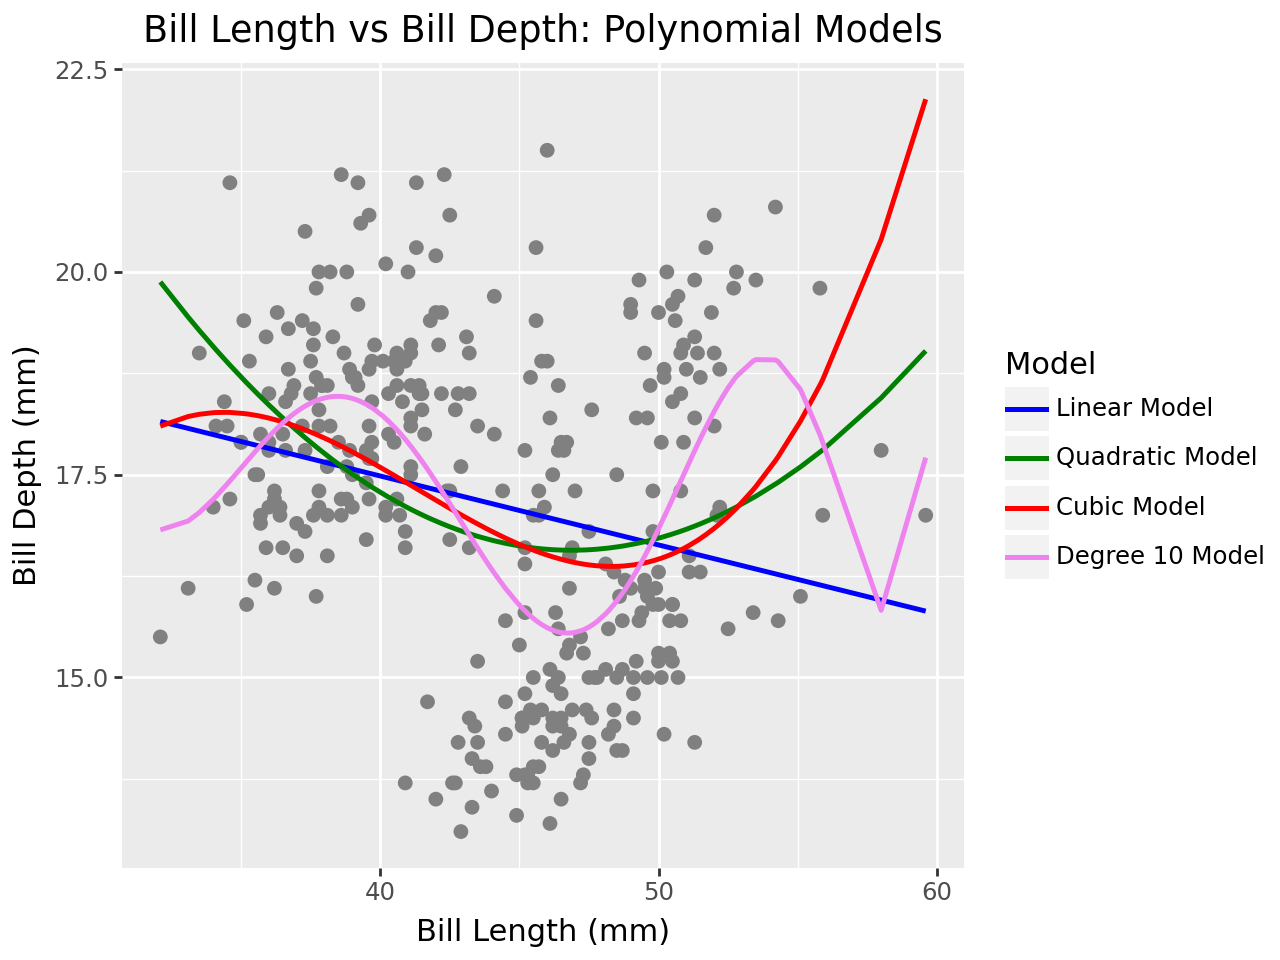

In [9]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme, scale_color_manual
import pandas as pd

data_points = pd.DataFrame({'Bill Length (mm)': X_sorted.flatten(), 'Bill Depth (mm)': y_sorted, 'Model': 'Data points'})
linear_df = pd.DataFrame({'Bill Length (mm)': X_sorted.flatten(), 'Bill Depth (mm)': linear_pred, 'Model': 'Linear Model'})
quad_df = pd.DataFrame({'Bill Length (mm)': X_sorted.flatten(), 'Bill Depth (mm)': quad_pred, 'Model': 'Quadratic Model'})
cubic_df = pd.DataFrame({'Bill Length (mm)': X_sorted.flatten(), 'Bill Depth (mm)': cubic_pred, 'Model': 'Cubic Model'})
poly_10_df = pd.DataFrame({'Bill Length (mm)': X_sorted.flatten(), 'Bill Depth (mm)': poly_10_pred, 'Model': 'Degree 10 Model'})

plot_data = pd.concat([data_points, linear_df, quad_df, cubic_df, poly_10_df])

plot = (
    ggplot(plot_data, aes(x='Bill Length (mm)', y='Bill Depth (mm)', color='Model')) +
    geom_point(data=data_points, color='gray', size=2, show_legend=True) +
    geom_line(data=linear_df, size=1) +
    geom_line(data=quad_df, size=1) +
    geom_line(data=cubic_df, size=1) +
    geom_line(data=poly_10_df, size=1) +
    scale_color_manual(values={
        'Data points': 'gray',
        'Linear Model': 'blue',
        'Quadratic Model': 'green',
        'Cubic Model': 'red',
        'Degree 10 Model': 'violet'
    }) +
    labs(title='Bill Length vs Bill Depth: Polynomial Models',
         x='Bill Length ',
         y='Bill Depth ',
         color='Model') +
    theme(legend_position='right')
)

plot


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Underfitting:
The Linear Model (blue line) underfits the data, as it’s too simple to capture the non-linear trends, missing important patterns.

Overfitting:
The Degree 10 Model (pink line) overfits, capturing noise in the data with excessive bends and oscillations that means it won't generalize well as it's most likely byhearting.

Best Fit:
The Cubic Model (red line) provides the best fit, balancing flexibility and simplicity to follow the main trend without overreacting to random fluctuations.